In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [48]:
df_merge = pd.read_csv('df_merged_cleaned.csv')
df_merge.iloc[:, :10].head(5)

,PatientID,StudyDate,Modality,FilePath,StudyDateParsed,Series UID,Collection,Data Description URI,Study UID,Study Description
0,ACRIN-NSCLC-FDG-PET-001,19600110,CT,manifest-1745037983505/ACRIN-NSCLC-FDG-PET/ACR...,1960-01-10,1.3.6.1.4.1.14519.5.2.1.7009.2403.798861112144...,ACRIN-NSCLC-FDG-PET,https://doi.org/10.7937/tcia.2019.30ilqfcl,1.3.6.1.4.1.14519.5.2.1.7009.2403.229569618363...,Abdomen1WBPETCT
1,ACRIN-NSCLC-FDG-PET-001,19600110,CT,manifest-1745037983505/ACRIN-NSCLC-FDG-PET/ACR...,1960-01-10,1.3.6.1.4.1.14519.5.2.1.7009.2403.798861112144...,ACRIN-NSCLC-FDG-PET,https://doi.org/10.7937/tcia.2019.30ilqfcl,1.3.6.1.4.1.14519.5.2.1.7009.2403.229569618363...,Abdomen1WBPETCT
2,ACRIN-NSCLC-FDG-PET-001,19600110,CT,manifest-1745037983505/ACRIN-NSCLC-FDG-PET/ACR...,1960-01-10,1.3.6.1.4.1.14519.5.2.1.7009.2403.798861112144...,ACRIN-NSCLC-FDG-PET,https://doi.org/10.7937/tcia.2019.30ilqfcl,1.3.6.1.4.1.14519.5.2.1.7009.2403.229569618363...,Abdomen1WBPETCT
3,ACRIN-NSCLC-FDG-PET-001,19600110,CT,manifest-1745037983505/ACRIN-NSCLC-FDG-PET/ACR...,1960-01-10,1.3.6.1.4.1.14519.5.2.1.7009.2403.798861112144...,ACRIN-NSCLC-FDG-PET,https://doi.org/10.7937/tcia.2019.30ilqfcl,1.3.6.1.4.1.14519.5.2.1.7009.2403.229569618363...,Abdomen1WBPETCT
4,ACRIN-NSCLC-FDG-PET-001,19600110,CT,manifest-1745037983505/ACRIN-NSCLC-FDG-PET/ACR...,1960-01-10,1.3.6.1.4.1.14519.5.2.1.7009.2403.798861112144...,ACRIN-NSCLC-FDG-PET,https://doi.org/10.7937/tcia.2019.30ilqfcl,1.3.6.1.4.1.14519.5.2.1.7009.2403.229569618363...,Abdomen1WBPETCT


In [47]:
df_merge.iloc[:, 10:].head(5)

,Study Date,Series Description,Manufacturer,SOP Class Name,SOP Class UID,Number of Images,File Size,Download Timestamp,FileSizeMB,Filename,Directory,FileExtension,StudyDateParsed_Suspicious,MB_per_Image,Unusual_Image_Size
0,01-10-1960,Abd.CT 5.0 B30s,SIEMENS,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,356,187.86 MB,2025-04-19 14:50:49.355,187.86,1-001.dcm,manifest-1745037983505/ACRIN-NSCLC-FDG-PET/ACR...,.dcm,True,0.527697,False
1,01-10-1960,Abd.CT 5.0 B30s,SIEMENS,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,356,187.86 MB,2025-04-19 14:50:49.355,187.86,1-002.dcm,manifest-1745037983505/ACRIN-NSCLC-FDG-PET/ACR...,.dcm,True,0.527697,False
2,01-10-1960,Abd.CT 5.0 B30s,SIEMENS,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,356,187.86 MB,2025-04-19 14:50:49.355,187.86,1-003.dcm,manifest-1745037983505/ACRIN-NSCLC-FDG-PET/ACR...,.dcm,True,0.527697,False
3,01-10-1960,Abd.CT 5.0 B30s,SIEMENS,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,356,187.86 MB,2025-04-19 14:50:49.355,187.86,1-004.dcm,manifest-1745037983505/ACRIN-NSCLC-FDG-PET/ACR...,.dcm,True,0.527697,False
4,01-10-1960,Abd.CT 5.0 B30s,SIEMENS,CT Image Storage,1.2.840.10008.5.1.4.1.1.2,356,187.86 MB,2025-04-19 14:50:49.355,187.86,1-005.dcm,manifest-1745037983505/ACRIN-NSCLC-FDG-PET/ACR...,.dcm,True,0.527697,False


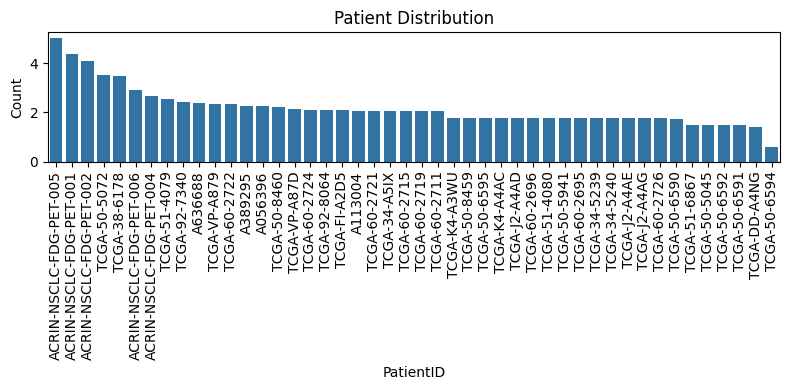

In [65]:
patientcounts = df_merge['PatientID'].value_counts(normalize=True) * 100
patientcounts_df = patientcounts.reset_index()
patientcounts_df.columns = ['PatientID', 'Count']

plt.figure(figsize=(8, 4))
sns.barplot(data=patientcounts_df, x='PatientID', y='Count')
plt.title('Patient Distribution')
plt.ylabel('Count')
plt.xlabel('PatientID')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

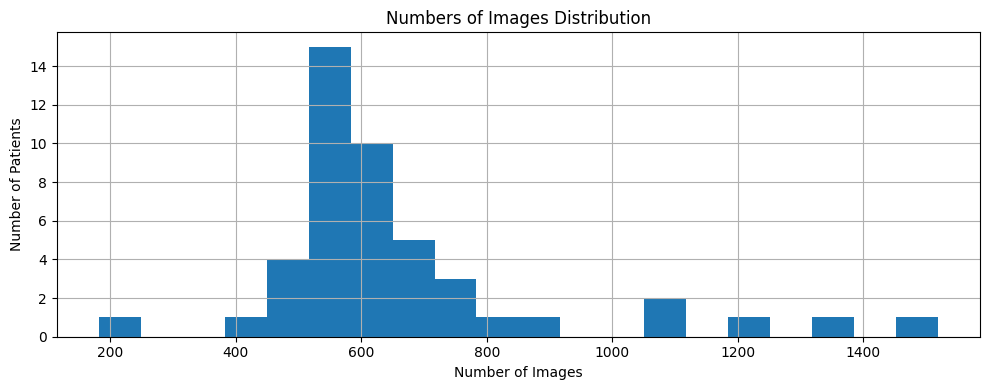

In [29]:
patient_counts = df_merge['PatientID'].value_counts()
plt.figure(figsize=(10, 4))
patient_counts.hist(bins=20)
plt.title('Numbers of Images Distribution')
plt.xlabel('Number of Images')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

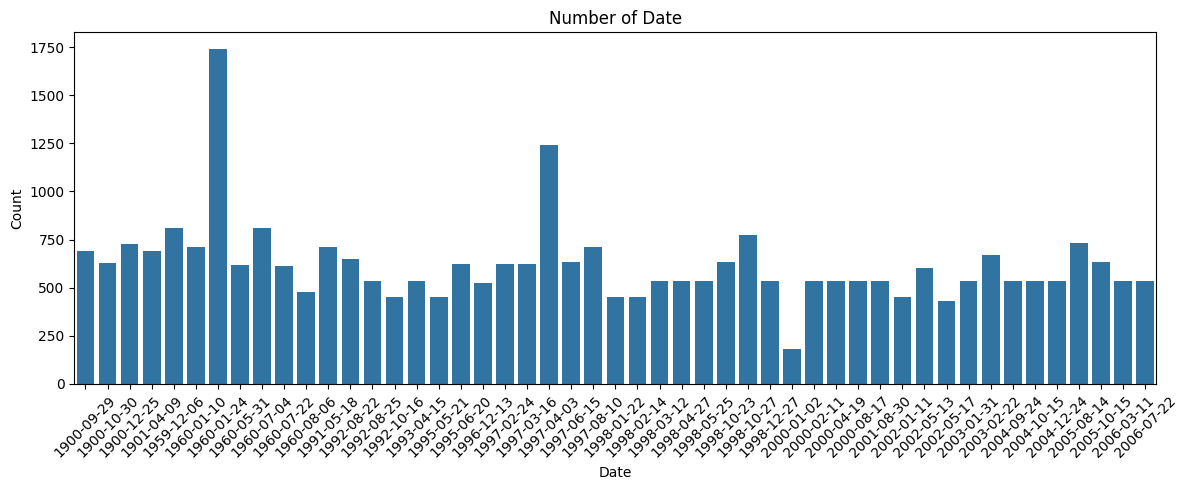

In [30]:
df_merge['StudyDateParsed'] = pd.to_datetime(df_merge['StudyDateParsed'])
daily_counts = df_merge['StudyDateParsed'].dt.date.value_counts().sort_index()
daily_df = pd.DataFrame({'date': daily_counts.index, 'count': daily_counts.values})

plt.figure(figsize=(12, 5))
sns.barplot(data=daily_df, x='date', y='count')
plt.title('Number of Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


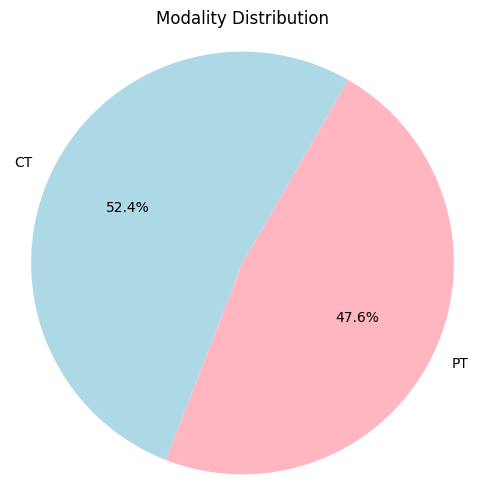

In [ ]:
modality_counts = df_merge['Modality'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(modality_counts, labels=modality_counts.index, autopct='%1.1f%%', startangle=60, colors=('lightblue', 'lightpink'))
plt.title('Modality Distribution')
plt.axis('equal')
plt.show()

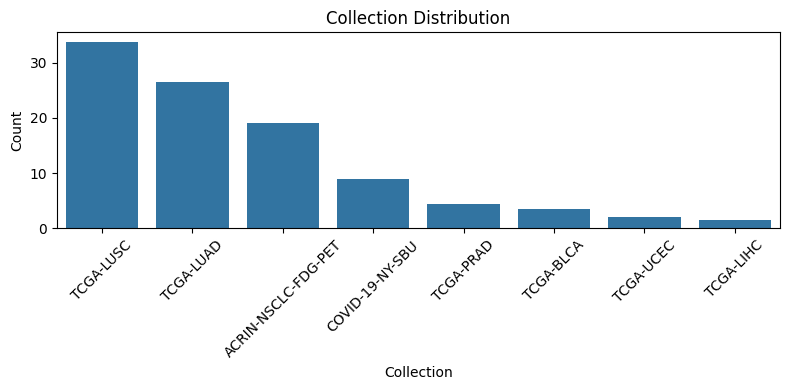

In [59]:
counts = df_merge['Collection'].value_counts(normalize=True) * 100
counts_df = counts.reset_index()
counts_df.columns = ['Collection', 'Count']

plt.figure(figsize=(8, 4))
sns.barplot(data=counts_df, x='Collection', y='Count')
plt.title('Collection Distribution')
plt.ylabel('Count')
plt.xlabel('Collection')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

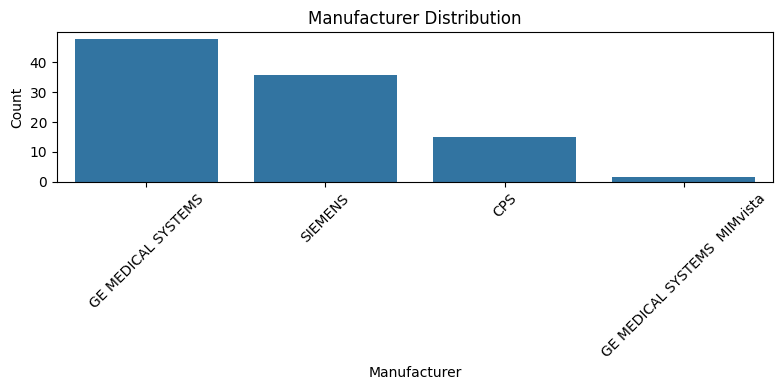

In [60]:
counts = df_merge['Manufacturer'].value_counts(normalize=True) * 100
counts_df = counts.reset_index()
counts_df.columns = ['Manufacturer', 'Count']

plt.figure(figsize=(8, 4))
sns.barplot(data=counts_df, x='Manufacturer', y='Count')
plt.title('Manufacturer Distribution')
plt.ylabel('Count')
plt.xlabel('Manufacturer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

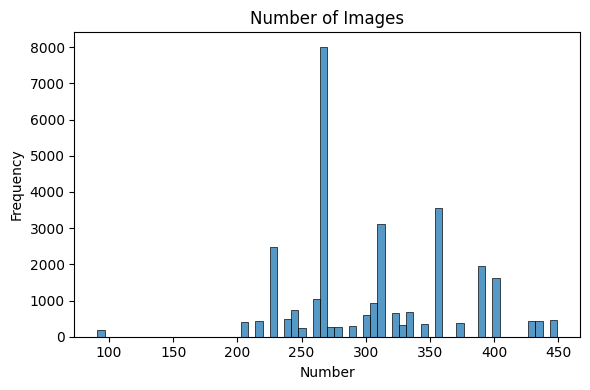

In [37]:
plt.figure(figsize=(6, 4))
sns.histplot(df_merge['Number of Images'].dropna())
plt.title("Number of Images")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

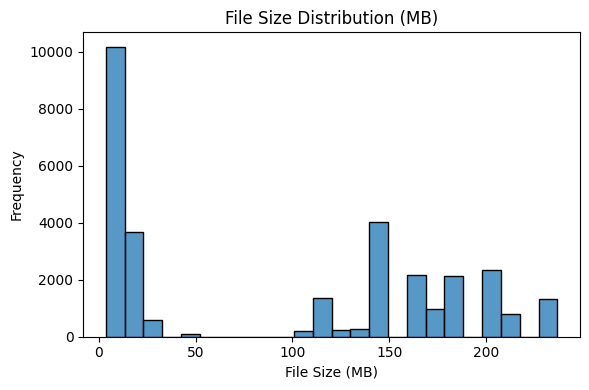

In [35]:
plt.figure(figsize=(6, 4))
sns.histplot(df_merge['FileSizeMB'].dropna())
plt.title("File Size Distribution (MB)")
plt.xlabel("File Size (MB)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()